In [1]:
# Functional libs
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Visual libs
from sklearn.metrics import ConfusionMatrixDisplay

# Own functions
from Functions import engineer_features
from Functions import split_data
from Functions import accuracy_scorer


In [2]:
data = pd.read_csv("./FIFA18_players_database/CompleteDataset.csv", low_memory=False)
data = engineer_features(data)
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Preferred Positions
0,75,77,57,68,36,59,39,26,35,28,...,64,40,50,63,78,79,64,75,34,CB
1,65,56,71,80,64,70,73,73,72,62,...,62,67,61,51,68,64,54,68,64,RM LM
2,85,33,62,66,60,65,53,45,60,61,...,68,58,57,27,75,76,20,64,62,ST
3,71,71,67,63,67,70,66,66,58,26,...,63,64,60,69,72,73,70,71,56,CDM CB RB
4,66,55,70,70,59,61,37,41,60,65,...,72,44,67,14,68,58,17,68,40,ST


In [3]:
X_train, X_test, y_train, y_test = split_data(data, 0)

In [4]:
# Make and train Random Forest
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Predict on Test and Train data
y_test_pred = rf_classifier.predict(X_test)
y_train_pred = rf_classifier.predict(X_train)

In [5]:
test_accuracy = accuracy_scorer(y_test, y_test_pred)
train_accuracy = accuracy_scorer(y_train, y_train_pred)

print(f'Test accuracy: {test_accuracy:0.3f}')
print(f'Train accuracy: {train_accuracy:0.3f}')

Test accuracy: 0.774
Train accuracy: 0.594


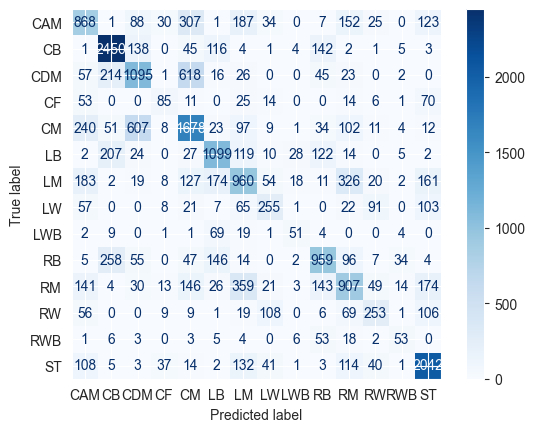

In [6]:
ConfusionMatrixDisplay.from_estimator(rf_classifier, X_train, y_train, cmap="Blues")

Much better than below.. so the model dose good on train but bad on test. Is the model overfitted?

CM is classified as CDM, very often.

In [12]:
# Hyperparameters to try
param_grid = {
    'n_estimators': [100],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

In [ ]:
# Find best parameters
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, n_jobs=1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.9s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   2.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   2.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   2.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; tot